# First Tests pyGeoStudio
To get some insights, and to discover that deleting points is not included.  
Thus created manual delete function which brakes everything thus created more functions to correct lines & regions.  
However, regions are most likely to be degined all over again.  
As help therefore created new draw with point_ids function.  
Final test: when deleting update regions & lines but ask user for input

In [1]:
import PyGeoStudio as pgs
import numpy as np

## Open GeoStudio study

In [2]:
src_file_1 = "Test1-SEEP-model_Schelde_T4000_NoClay.gsz"
geofile_1 = pgs.GeoStudioFile(src_file_1)

**Structure of GeoStudioFile object**

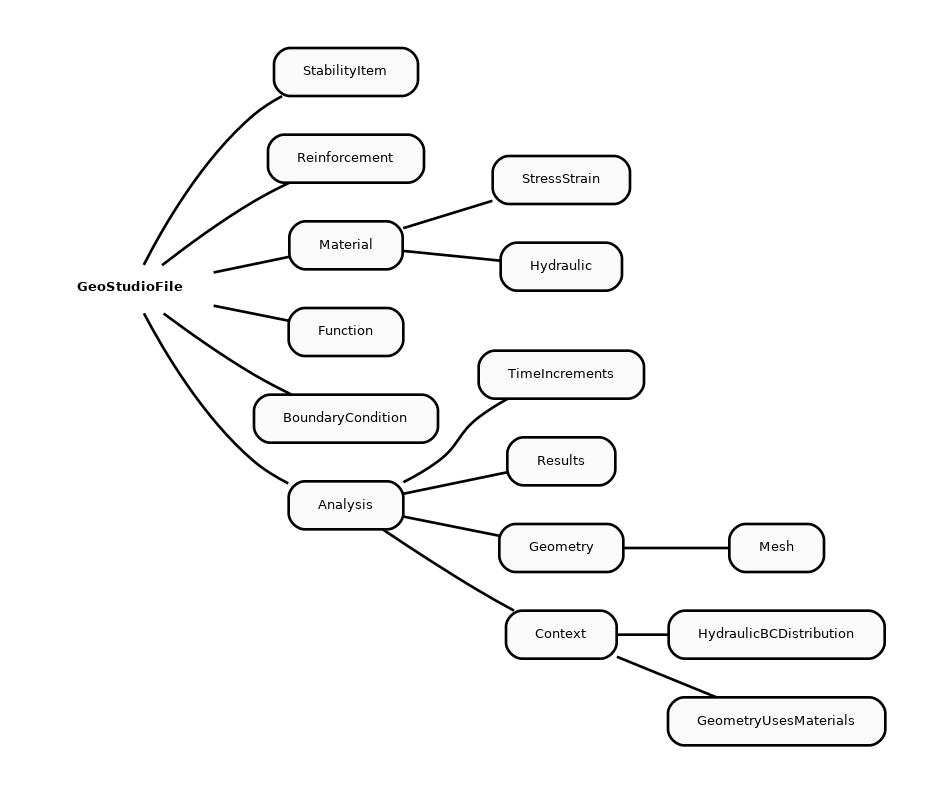!

## GeoStudioFile.Material

In [3]:
geofile_1.showMaterials()

+----+------------------+------------+-------------+
| ID |       Name       | Seep Model | Slope Model |
+----+------------------+------------+-------------+
| 1  |   Sand (Dike)    |  SatUnsat  |     None    |
| 2  |  Clay (Drained)  |  SatOnly   |     None    |
| 3  | Clay (Undrained) |  SatUnsat  |     None    |
| 4  |  Sand (Ground)   |  SatUnsat  |     None    |
+----+------------------+------------+-------------+


In [4]:
sand_dike = geofile_1.getMaterialByName("Sand (Dike)") #get material nammed "Sand (Dike)"
print(sand_dike)

Material Sand (Dike) (ID 1, RGB color RGB Color = [255, 255, 128])
Seep model: SatUnsat
Hydraulic Function: {'KFnNum': '1', 'VolWCFnNum': '2', 'KFn': <PyGeoStudio.Function.Function object at 0x0000018138DF3F50>, 'VolWCFn': <PyGeoStudio.Function.Function object at 0x000001813931AEA0>}
Slope model: None
Stress strain model parameter: {}


In [5]:
print(dir(sand_dike))

['__class__', '__deinitialize__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__initialize__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '__write__', 'data', 'getAllProperties', 'my_data', 'other_elem', 'parameter_type', 'read', 'showAvailableProperties']


In [6]:
sand_dike.getAllProperties()

{'ID': '1',
 'Color': <PyGeoStudio.Color.Color at 0x18138df3320>,
 'Name': 'Sand (Dike)',
 'SeepModel': 'SatUnsat',
 'SlopeModel': 'None',
 'StressStrain': <PyGeoStudio.Material.MaterialStressStrain at 0x18138df1cd0>,
 'Hydraulic': <PyGeoStudio.Material.MaterialHydraulicFunction at 0x18139318410>}

In [7]:
sand_dike['Hydraulic'].getAllProperties()

{'KFnNum': '1',
 'VolWCFnNum': '2',
 'KFn': <PyGeoStudio.Function.Function at 0x18138df3f50>,
 'VolWCFn': <PyGeoStudio.Function.Function at 0x1813931aea0>}

In [8]:
sand_dike['Hydraulic']['KFn'].parameter_type

{'ID': int,
 'Name': str,
 'Points': list,
 'Function': str,
 'Estimate': str,
 'Types': list,
 'FunctionParameter': dict,
 'FunctionType': str}

In [9]:
print(sand_dike['Hydraulic']['KFn']['Name'], '\n')
print(sand_dike['Hydraulic']['KFn']['Points'], '\n')
print(sand_dike['Hydraulic']['KFn']['Function'], '\n')
print(sand_dike['Hydraulic']['KFn']['Estimate'], '\n')
print(sand_dike['Hydraulic']['KFn']['Types'], '\n')
print(sand_dike['Hydraulic']['KFn']['FunctionParameter'], '\n')
print(sand_dike['Hydraulic']['KFn']['FunctionType'], '\n')

Dicht gepakt zand 

[[1.00000000e-02 5.78700000e-05]
 [1.13121657e-02 5.78675415e-05]
 [1.27965093e-02 5.78642769e-05]
 [1.44756233e-02 5.78594001e-05]
 [1.63750649e-02 5.78522153e-05]
 [1.85237447e-02 5.78425361e-05]
 [2.09543670e-02 5.78303239e-05]
 [2.37039271e-02 5.78154324e-05]
 [2.68142751e-02 5.77971343e-05]
 [3.03327522e-02 5.77745091e-05]
 [3.43129119e-02 5.77465708e-05]
 [3.88153345e-02 5.77119134e-05]
 [4.39085495e-02 5.76689730e-05]
 [4.96700787e-02 5.76161314e-05]
 [5.61876160e-02 5.75513320e-05]
 [6.35603621e-02 5.74723348e-05]
 [7.19005348e-02 5.73766828e-05]
 [8.13350762e-02 5.72599115e-05]
 [9.20075859e-02 5.71165804e-05]
 [1.04080506e-01 5.69411551e-05]
 [1.17737592e-01 5.67264654e-05]
 [1.33186715e-01 5.64645106e-05]
 [1.50663019e-01 5.61473252e-05]
 [1.70432503e-01 5.57647157e-05]
 [1.92796072e-01 5.53053092e-05]
 [2.18094111e-01 5.47577248e-05]
 [2.46711672e-01 5.41016575e-05]
 [2.79084331e-01 5.33111571e-05]
 [3.15704819e-01 5.23626725e-05]
 [3.57130522e-01 5.1234

## GeoStudioFile.Analysis

In [10]:
src_file_2 = "Test1-SEEP-model_Schelde_T4000_NoClay.gsz"
geofile_2 = pgs.GeoStudioFile(src_file_2)

In [11]:
geofile_2.showAnalysisTree()

GeoStudio file: Test1-SEEP-model_Schelde_T4000_NoClay.gsz
+----+-----------------------------------+----------+
| ID |                Name               | ParentID |
+----+-----------------------------------+----------+
| 1  | ZeeSchelde_T4000 (Scenario 4) (4) |   None   |
+----+-----------------------------------+----------+


In [12]:
analysis1 = geofile_2.getAnalysisByID(1)
print(dir(analysis1))

['__class__', '__deinitialize__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__initialize__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '__write__', 'data', 'getAllProperties', 'my_data', 'other_elem', 'parameter_type', 'read', 'setContext', 'setGeometry', 'showAvailableProperties', 'showProblem']


In [13]:
analysis1.getAllProperties()

{'ID': '1',
 'Name': 'ZeeSchelde_T4000 (Scenario 4) (4)',
 'Kind': 'SEEP/W',
 'Method': 'Transient',
 'GeometryId': '1',
 'TimeIncrements': <PyGeoStudio.Analysis.TimeIncrements at 0x18139457fe0>,
 'ComputedPhysics': {'WaterTransfer': 'true'},
 'Geometry': <PyGeoStudio.Geometry.Geometry at 0x18136796600>,
 'Results': <PyGeoStudio.Results.Results at 0x1813927cd70>,
 'Context': <PyGeoStudio.Context.Context at 0x18136796450>}

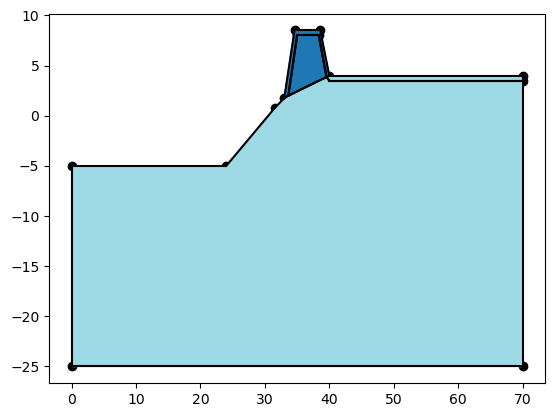

In [14]:
analysis1.showProblem()

In [15]:
analysis1.Name = 'ZeeSchelde_T4000_Transient'

## Save in python memory (with .save()) or in .gsz file (with saveAs(out_file))

In [16]:
# Overwrite study in Python memory
geofile_2.save()
# Or save in a new file
out_file = "Test2-SEEP-model_Schelde_T4000_NoClay.gsz"
geofile_2.saveAs(out_file)

GeoStudio study successfully written in Test2-SEEP-model_Schelde_T4000_NoClay.gsz


## GeoStudioFile.Geometry

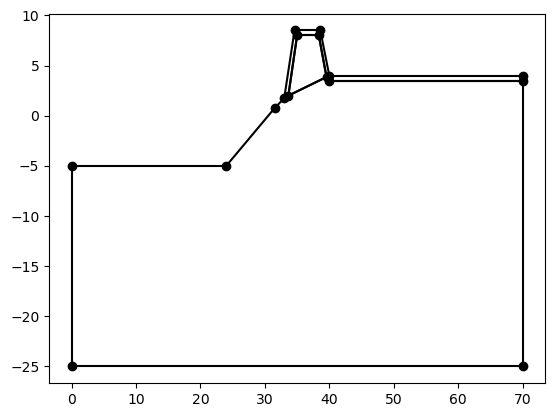

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [17]:
geom = analysis1['Geometry']
geom.draw()

### Geometry['Regions'] or Geometry.regions

In [18]:
geom['Regions']  # prints {'Name-1', [list_pointids, Element MEsh], ... }

{'Regions-1': [[3, 4, 1, 12, 16, 15, 5, 10, 9, 11],
  [<Element 'Mesh' at 0x000001813988F970>]],
 'Regions-2': [[2, 6, 16, 12, 1], [<Element 'Mesh' at 0x000001813988FB00>]],
 'Regions-3': [[5, 7, 8, 6, 16, 14, 13, 15],
  [<Element 'Mesh' at 0x000001813988FC90>]],
 'Regions-4': [[15, 13, 14, 16], [<Element 'Mesh' at 0x000001813988FE20>]]}

### Geometry['Lines'] or Geometry.lines

In [19]:
geom['Lines']  # prints array with row per line showing [start_pt, end_pt]

array([[ 2,  3],
       [ 3,  0],
       [10,  2],
       [ 1,  5],
       [11,  0],
       [ 9,  8],
       [ 8, 10],
       [ 4,  6],
       [ 6,  7],
       [ 7,  5],
       [13, 12],
       [12, 14],
       [14,  4],
       [ 5, 15],
       [15, 14],
       [15, 13],
       [15, 11],
       [ 0,  1],
       [ 4,  9]], dtype=int64)

### Geometry['Points'] or Geometry.points

In [20]:
print(geom['Points'].shape)
geom['Points']  # or geom.points

(16, 2)


array([[ 70.      ,   3.5     ],
       [ 70.      ,   4.      ],
       [  0.      , -25.      ],
       [ 70.      , -25.      ],
       [ 33.      ,   1.75    ],
       [ 40.      ,   4.      ],
       [ 34.6     ,   8.5     ],
       [ 38.6     ,   8.5     ],
       [ 24.      ,  -5.      ],
       [ 31.5     ,   0.75    ],
       [  0.      ,  -5.      ],
       [ 40.      ,   3.5     ],
       [ 35.      ,   8.      ],
       [ 38.370446,   8.      ],
       [ 33.641046,   2.      ],
       [ 39.566743,   3.860553]])

Let's print points with ids

In [21]:
def print_points_with_ids(geom):
    for idx, point in enumerate(geom.points):
        point_id = idx + 1
        x, y = point
        print(f"Point ID {point_id}: ({x}, {y})")

In [22]:
print_points_with_ids(geom)

Point ID 1: (70.0, 3.5)
Point ID 2: (70.0, 4.0)
Point ID 3: (0.0, -25.0)
Point ID 4: (70.0, -25.0)
Point ID 5: (33.0, 1.75)
Point ID 6: (40.0, 4.0)
Point ID 7: (34.6, 8.5)
Point ID 8: (38.6, 8.5)
Point ID 9: (24.0, -5.0)
Point ID 10: (31.5, 0.75)
Point ID 11: (0.0, -5.0)
Point ID 12: (40.0, 3.5)
Point ID 13: (35.0, 8.0)
Point ID 14: (38.370446, 8.0)
Point ID 15: (33.641046, 2.0)
Point ID 16: (39.566743, 3.860553)


Delete points is not a function, thus do it manually with numpy **but regions & lines must be updated !!!***

## Save in python memory (with .save()) or in .gsz file (with saveAs(out_file))

In [23]:
import matplotlib.pyplot as plt
def draw_with_point_ids(geom, show=True):
    """
    Draw the geometry using matplotlib and label each point with its ID.
    
    :param show: Show the figure (``True``, default) or plot it and show it later (``False``)
    :type show: bool
    :return: Matplotlib figure and axis containing the plotted geometry
    :rtype: [fig, ax]
    """
    fig, ax = plt.subplots()
    
    # Draw points
    ax.scatter(geom.points[:, 0], geom.points[:, 1], color='k')
    
    # Label each point with its ID
    for idx, (x, y) in enumerate(geom.points):
        point_id = idx + 1
        ax.text(x, y, str(point_id), fontsize=9, ha='right', va='bottom', color='blue')
    
    # Draw lines
    for region in geom.regions.values():
        region = region[0]
        for i in range(len(region) - 1):
            X1, Y1 = geom.points[region[i] - 1]
            X2, Y2 = geom.points[region[i + 1] - 1]
            ax.plot([X1, X2], [Y1, Y2], 'k')
        X1, Y1 = geom.points[region[-1] - 1]
        X2, Y2 = geom.points[region[0] - 1]
        ax.plot([X1, X2], [Y1, Y2], 'k')
    
    if show:
        plt.show()
    
    return fig, ax
    

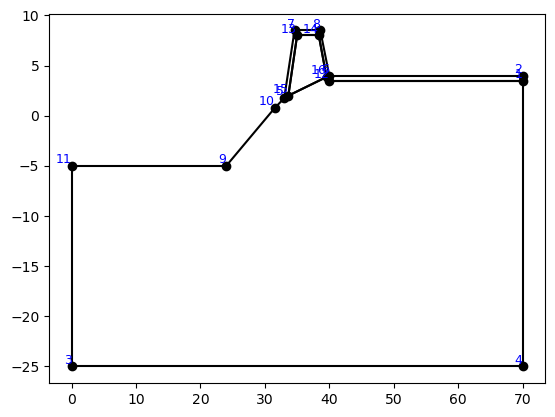

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [24]:
draw_with_point_ids(geom)

## New test for deleting points and correctly updating regions/lines with user input

In [25]:
def delete_point_wUI(geom, point_id):
    index_to_delete = point_id - 1
    geom.points = np.delete(geom.points, index_to_delete, axis=0)

    affected_regions = {}
    updated_regions = {}

    for region_name, (point_list, mesh_element) in geom.regions.items():
        if point_id in point_list:
            filtered_points = [pid for pid in point_list if pid != point_id]
            affected_regions[region_name] = (filtered_points, mesh_element)
        else:
            updated_points = [pid - 1 if pid > point_id else pid for pid in point_list]
            updated_regions[region_name] = [updated_points, mesh_element]

    if affected_regions:
        draw_with_point_ids(geom)

        for region_name, (filtered_points, mesh_element) in affected_regions.items():
            response = input(f"Do you want to add new points to region '{region_name}'? (y/n): ").strip().lower()
            if response == 'y':
                new_points_input = input("Enter new points as comma-separated x,y pairs (e.g., 10,5 12,6): ").strip()
                new_points = []
                for pair in new_points_input.replace(',', ' ').split():
                    if pair:
                        coords = list(map(float, pair.split()))
                        if len(coords) == 2:
                            new_points.append(coords)
                for pt in new_points:
                    geom.points = np.vstack([geom.points, pt])
                new_ids = list(range(len(geom.points) - len(new_points) + 1, len(geom.points) + 1))
                new_region = filtered_points + new_ids
            else:
                new_region = filtered_points

            user_region_input = input(f"Enter new region point IDs for '{region_name}' (default: {new_region}): ").strip()
            if user_region_input:
                cleaned_input = user_region_input.replace(',', ' ').split()
                new_region = list(map(int, cleaned_input))
            updated_regions[region_name] = [new_region, mesh_element]

    geom.regions = updated_regions

    # Rebuild lines from updated regions
    new_lines = []
    for region in geom.regions.values():
        pts = region[0]
        for i in range(len(pts)):
            start_idx = pts[i] - 1
            end_idx = pts[(i + 1) % len(pts)] - 1
            new_lines.append([start_idx, end_idx])
    geom.lines = np.array(new_lines, dtype=int)



IndexError: index 15 is out of bounds for axis 0 with size 15

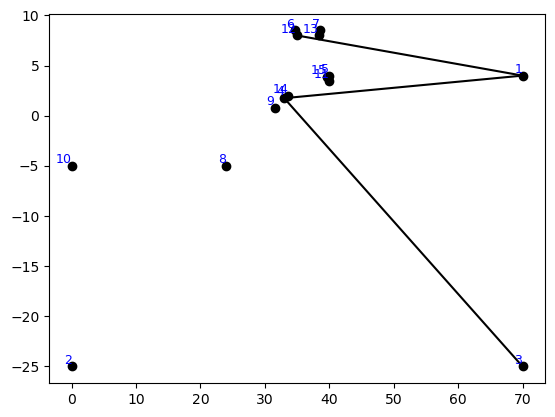

In [26]:
delete_point_wUI(geom, 1)

In [ ]:
draw_with_point_ids(geom)

.  
.  
.  
To be implemented later